# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Jedinečným identifikátorem zastávky je **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek uvažujte, že se jedná o jednu a tutéž stanici.

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

# **📊Řešení📈**

 ## *✨Dataset* a *⚙️Předzpracování dat*

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

> ##### Načtěme dataset

In [ ]:
pid = pd.read_csv("d.csv")

> ##### Podiváme se jak vypadá dataframe

In [3]:
pid.head()

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,U2991Z301,Hněvice,T58005,Hněvice seř.n.,4:53:00,4:54:30,2,0,1,1,1,1,1,0,0
1,T58005,Hněvice seř.n.,U4610Z301,Záluží,4:54:30,4:56:00,2,0,1,1,1,1,1,0,0
2,U4610Z301,Záluží,U4609Z301,Dobříň,4:56:00,4:59:00,2,0,1,1,1,1,1,0,0
3,U4609Z301,Dobříň,U4608Z301,Roudnice nad Labem,4:59:00,5:03:00,2,0,1,1,1,1,1,0,0
4,U4608Z301,Roudnice nad Labem,U4609Z301,Dobříň,4:36:00,4:38:00,2,0,1,1,1,1,1,0,0


> ##### Podívejme se na velikost datasetu a typ hodnot v sloupcích a informace o dataframu

In [4]:
print(f"Dataframe má {pid.shape[0]} řádků a {pid.shape[1]} sloupců")
pid.info()

Dataframe má 1642433 řádků a 15 sloupců
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  int64 
 8   monday          1642433 non-null  int64 
 9   tuesday         1642433 non-null  int64 
 10  wednesday       1642433 non-null  int64 
 11  thursday        1642433 non-null  int64 
 12  friday          1642433 non-null  int64 
 13  saturday        1642433 non-null  int64 
 14  sunday          1642433 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 188.0+ MB


> ##### Odstraním nepotřebné sloupce

In [5]:
pid.drop(columns=["stop_from", "stop_to"], inplace=True)

> ##### Zkontrolujeme všechny přiznaky na prázdné hodnoty

In [6]:
words = ["Unknown", "N/A", "None", "-", "?", ""] # co tam asi muze byt
word_stats = {}

for col in pid.columns:
    count = 0
    for word in words:
        count += (pid[col] == word).sum()
    word_stats[col] = count

for col, count in word_stats.items():
    print(f"Přiznak {col}: {count} prázdných hodnot")

Přiznak stop_from_name: 0 prázdných hodnot
Přiznak stop_to_name: 0 prázdných hodnot
Přiznak depart_from: 0 prázdných hodnot
Přiznak arrive_to: 0 prázdných hodnot
Přiznak route_type: 0 prázdných hodnot
Přiznak is_night: 0 prázdných hodnot
Přiznak monday: 0 prázdných hodnot
Přiznak tuesday: 0 prázdných hodnot
Přiznak wednesday: 0 prázdných hodnot
Přiznak thursday: 0 prázdných hodnot
Přiznak friday: 0 prázdných hodnot
Přiznak saturday: 0 prázdných hodnot
Přiznak sunday: 0 prázdných hodnot


> ##### Změním zakódovaný typ dopravy v příznaku ***route_type*** na název dopravy podle dokumentace

In [7]:
transport_types = {
    0: 'Tram',
    1: 'Metro',
    2: 'Vlak',
    3: 'Bus',
    4: 'Privoz',
    7: 'Lanovka'
}

pid['route_type'] = pid['route_type'].replace(transport_types)

> ##### Zkonvertuju kategorické příznaky na typ category

In [8]:
to_category = ["stop_from_name", "stop_to_name", "route_type"]

for column in to_category:
    pid[column] = pid[column].astype("category")

> ##### Změním typ příznaků obsahujících pouze 0 a 1 na bool

In [9]:
to_bool = ['is_night', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

for column in to_bool:
    pid[column] = pid[column].astype(bool)

> ##### Opravíme chyby v časech odjezdu a příjezdu a nastavíme správný typ dat.

In [10]:
def correct_time(time_str):
    hours, minutes, seconds = map(int, time_str.split(':')) # rozdělení času na hodiny, minuty a sekundy
    hours %= 24 # modulo 24
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}" # vracíme správný čas jako řetězec

pid['depart_from'] = pid['depart_from'].apply(correct_time)
pid['arrive_to'] = pid['arrive_to'].apply(correct_time)

# Převod na spravný datový typ (v dataframu se označí jako object)
pid['depart_from'] = pd.to_datetime(pid['depart_from'], format='%H:%M:%S').dt.time
pid['arrive_to'] = pd.to_datetime(pid['arrive_to'], format='%H:%M:%S').dt.time

> ##### Načteme data s geolokací zastávek a odstraníme nepotřebné sloupce

In [11]:
stops = pd.read_csv("stops.csv")
stops.drop(columns=['stop_id', 'zone_id', 'stop_url',
       'location_type', 'parent_station', 'wheelchair_boarding', 'level_id',
       'platform_code', 'asw_node_id', 'asw_stop_id'], inplace=True)

> ##### Data obsahují geolokaci zastávek pro několik druhů dopravy. Budu je považovat za jednu zastávku a pro výpočet souřadnic použiji obvyklou průměrnou hodnotu souřadnic, jednak protože je to jednodušší na realizaci než výpočet těžiště mnohoúhelníku, a jednak protože takové zastávky jsou obvykle relativně blízko sebe, takže výsledná přesnost pro layoutování grafu bude zcela dostatečná

In [12]:
stops = stops.groupby('stop_name').agg({'stop_lat': 'mean', 'stop_lon': 'mean'}).reset_index()

## *🕸️Základní síťová analýza*

> ##### Rozhodl jsem se vizualizovat a analyzovat pouze tramvajové zastávky, což má několik důvodů. Zaprvé, tramvajová síť je v Praze dobře rozvinutá a pokrývá většinu klíčových čtvrtí, což z ní dělá důležitý prvek městské hromadné dopravy, který lze objektivně analyzovat.
> ##### Kromě toho zpracování pouze jednoho druhu dopravy zjednodušuje vizualizaci, čímž zvyšuje čitelnost a srozumitelnost grafu. Zahrnutí všech druhů dopravy by mohlo graf znepřehlednit a ztížit jeho interpretaci, což by mohlo vést ke zmatení nebo nesprávné interpretaci údajů.
> ##### A také mezi všemi druhy dopravy nejčastěji já používám tramvaje :)

> ##### Sestavím graf tramvajových zastávek a spojů mezi nimi.

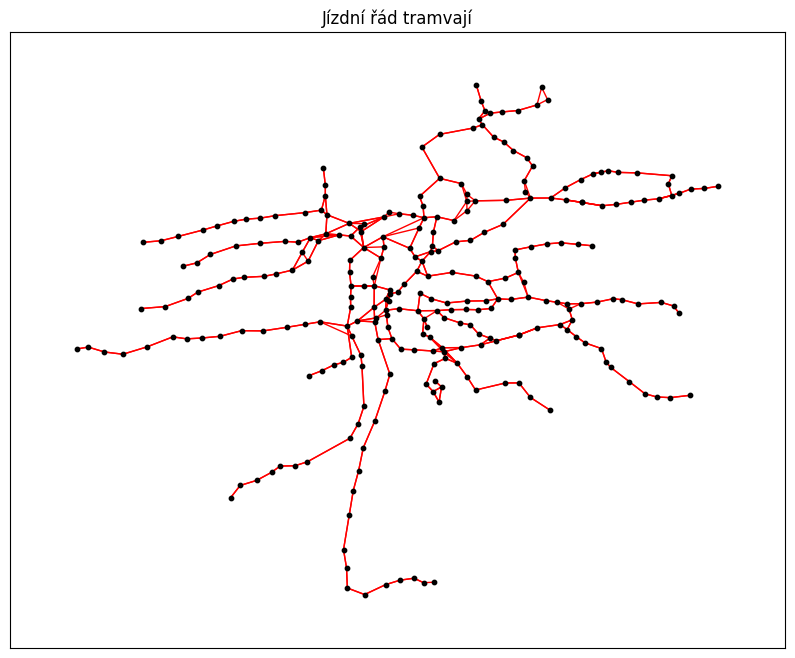

In [13]:
tram_data = pid[pid['route_type'] == 'Tram'] # Vybereme jenom tramvajový jízdní řád.

used_stops = pd.unique(tram_data[['stop_from_name', 'stop_to_name']].values.ravel('K')) # Vybereme zastávky

filtered_stops = stops[stops['stop_name'].isin(used_stops)] # Ze všech zastávek vybereme pouze tramvajové zastávky.

tram_edges_weights = tram_data.groupby(['stop_from_name', 'stop_to_name'], observed=False).size().reset_index(name='weight') # Vypočítejme váhu hran a vezměme pouze existující cesty.
tram_edges_weights = tram_edges_weights[tram_edges_weights['weight'] > 0]

G = nx.Graph()
for index, row in filtered_stops.iterrows(): # Vložíme uzly
    G.add_node(row['stop_name'], pos=(row['stop_lon'], row['stop_lat']))
    
for index, row in tram_edges_weights.iterrows(): # Vložíme hrany
    G.add_edge(row['stop_from_name'], row['stop_to_name'], weight=row['weight'])

# Vykřeslime graf
fig, ax = plt.subplots(figsize=(10, 8))
nx.draw_networkx_edges(G, pos=nx.get_node_attributes(G, 'pos'), edgelist=tram_edges_weights[['stop_from_name', 'stop_to_name']].values, edge_color='red', arrows=False)
nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'pos'), node_size=10, node_color='black')
ax.set_title("Jízdní řád tramvají");

> ##### Zobrazím graf na mapě Prahy pomocí knihovny Folium.

In [14]:
# Centrování mapy podle souřadnic
map_center = (filtered_stops['stop_lat'].mean(), filtered_stops['stop_lon'].mean())
m = folium.Map(location=map_center, zoom_start=12)

# Přidání tramvajových linek do mapy
for index, row in tram_edges_weights.iterrows():
    stop_from = filtered_stops[filtered_stops['stop_name'] == row['stop_from_name']].iloc[0]
    stop_to = filtered_stops[filtered_stops['stop_name'] == row['stop_to_name']].iloc[0]
    line_points = [
        (stop_from['stop_lat'], stop_from['stop_lon']),
        (stop_to['stop_lat'], stop_to['stop_lon'])
    ]
    folium.PolyLine(line_points, color='red', weight=2.5, opacity=1).add_to(m)

# Přidání označení zastávek do mapy
for index, row in filtered_stops.iterrows():
    folium.CircleMarker(
        location=(row['stop_lat'], row['stop_lon']),
        radius=3,
        color='black',
        fill=True,
        tooltip=row['stop_name']
    ).add_to(m)

m

> ##### 👆 Z této mapy je vidět, že zastávky na grafu odpovídají skutečným zastávkám na mapě (po najetí na zastávku se zobrazí její název). Zároveň je možne všimnout, že některé zastávky jsou umístěny trochu zvláštně, protože jsme počítali průměrnou hodnotu mezi souřadnicemi, ale to nemá velký vliv na čitelnost a správnost grafu.

### Stupnova centralita

Uzly s nejvyšším stupněm:
Uzel: Karlovo náměstí, Stupeň: 8
Uzel: Malostranská, Stupeň: 7
Uzel: Náměstí Bratří Synků, Stupeň: 6

Uzly s nejnižším stupněm:
Uzel: Ústřední dílny DP, Stupeň: 1
Uzel: Zvonařka, Stupeň: 1
Uzel: Vozovna Pankrác, Stupeň: 1


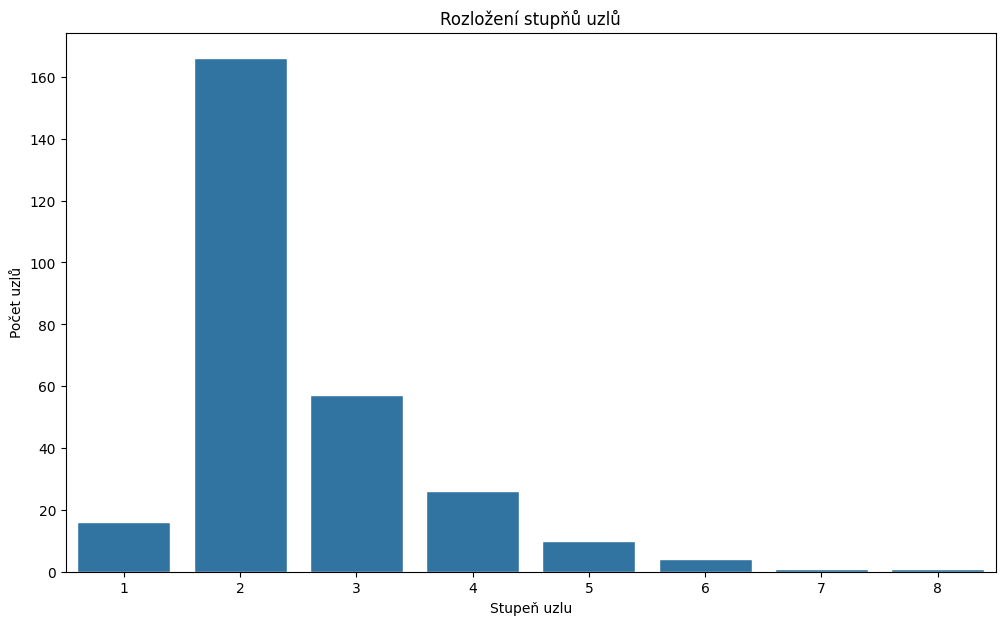

In [15]:
# Výpočet stupně každého uzlu
node_degrees = dict(G.degree())

# Seřazení uzlů podle stupně
sorted_node_degrees = sorted(node_degrees.items(), key=lambda item: item[1], reverse=True)

# Vypíšeme několik uzlů s nejvyšším a nejnižším stupněm
print("Uzly s nejvyšším stupněm:")
for i in range(3):
    print(f"Uzel: {sorted_node_degrees[i][0]}, Stupeň: {sorted_node_degrees[i][1]}")

print("\nUzly s nejnižším stupněm:")
for i in range(1, 4):
    print(f"Uzel: {sorted_node_degrees[-i][0]}, Stupeň: {sorted_node_degrees[-i][1]}")

# Vytvoříme DataFrame pro snadnější použití seaborn
degree_df = pd.DataFrame(list(node_degrees.items()), columns=['node', 'degree'])

# Vytvoříme graf rozložení stupňů vrcholů
fig, ax = plt.subplots(figsize=(12, 7))
sns.set_style("whitegrid")
sns.countplot(x='degree', data=degree_df, ax=ax)
ax.set_title('Rozložení stupňů uzlů')
ax.set_xlabel('Stupeň uzlu')
ax.set_ylabel('Počet uzlů');

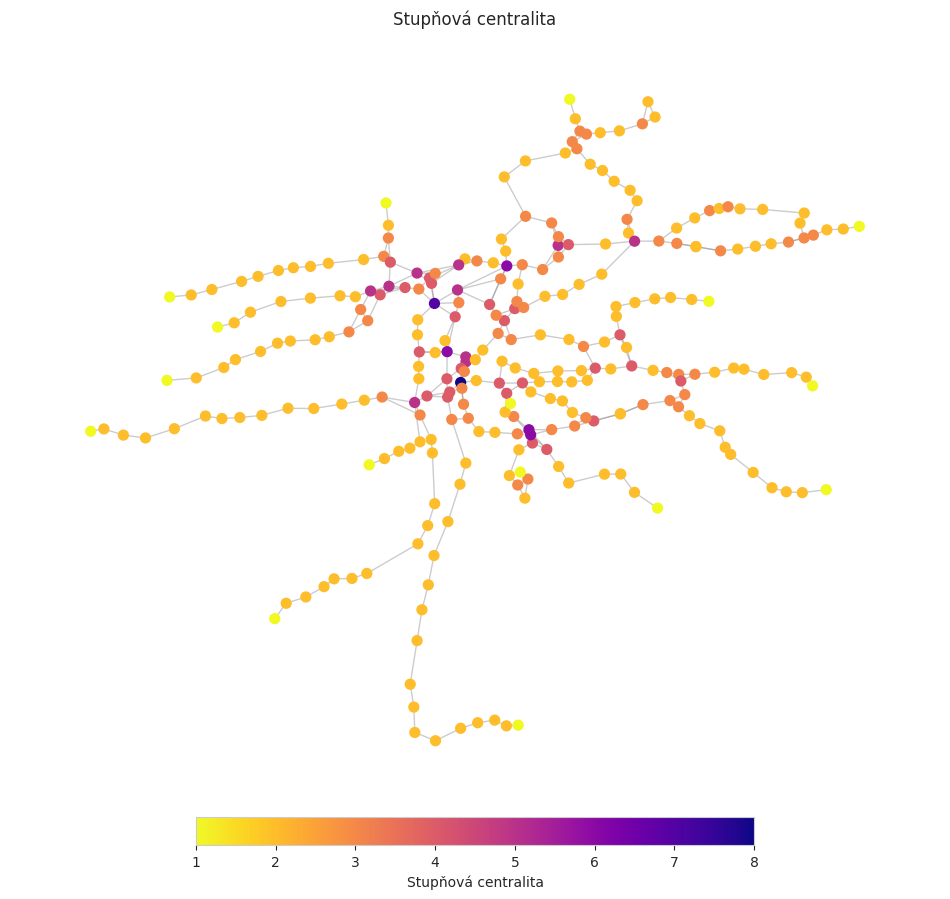

In [16]:
# Příprava pozic uzlů
pos = {row['stop_name']: (row['stop_lon'], row['stop_lat']) for index, row in filtered_stops.iterrows()}

# Vizualizace grafu
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw_networkx_edges(G, pos, edge_color='grey', alpha=0.4)

# Vykreslení uzlů a uložení návratové hodnoty pro použití jako mapovatelného objektu pro colorbar
node_colors = [node_degrees[node] for node in G.nodes()]
nodes_drawn = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.plasma_r, node_size=50)

ax.axis('off')
ax.set_title('Stupňová centralita')

# Vytvoření colorbaru
fig.colorbar(nodes_drawn, pad=0.01, shrink=0.6, orientation='horizontal', label='Stupňová centralita');

> ##### 👆 Po analýze a vizualizaci této centrality lze vyvodit následující závěry:
> - ##### Za prvé, většina zastávek má stupeň 2, to znamená, že se nachází právě mezi jinými zastávkami.
> - ##### Za druhé, zastávky s nejvyšším stupněm se nacházejí v centru města, protože právě tam se nacházejí spojovací uzly linek.
> - ##### A za třetí, uzly se stupněm 1 jsou konečné zastávky, které jsou obvykle na okraji města.

### Centralita blízkosti

In [17]:
# Výpočet centrality blízkosti
closeness_centrality = nx.closeness_centrality(G)

# Řazení uzlů podle centrality blízkosti
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)

# Výpis uzlů s nejvyšší a nejnižší centralitou blízkosti
print("Uzly s nejvyšší centralitou blízkosti:")
for i in range(5):
    print(f"Uzel: {sorted_closeness_centrality[i][0]}, Centralita blízkosti: {sorted_closeness_centrality[i][1]:.5f}")

print("\nUzly s nejmenší centralitou blízkosti:")
for i in range(1, 6):
    print(f"Uzel: {sorted_closeness_centrality[-i][0]}, Centralita blízkosti: {sorted_closeness_centrality[-i][1]:.5f}")

Uzly s nejvyšší centralitou blízkosti:
Uzel: Malostranská, Centralita blízkosti: 0.09979
Uzel: Národní divadlo, Centralita blízkosti: 0.09887
Uzel: Staroměstská, Centralita blízkosti: 0.09856
Uzel: Čechův most, Centralita blízkosti: 0.09828
Uzel: Právnická fakulta, Centralita blízkosti: 0.09811

Uzly s nejmenší centralitou blízkosti:
Uzel: Nádraží Hostivař, Centralita blízkosti: 0.03819
Uzel: Levského, Centralita blízkosti: 0.03830
Uzel: Lehovec, Centralita blízkosti: 0.03953
Uzel: Hostivařská, Centralita blízkosti: 0.03970
Uzel: Sídliště Modřany, Centralita blízkosti: 0.03982


> ##### 👆 Podle těchto výsledků lze konstatovat, že zastávky umístěné v centru města mají nejvyšší centralitu blízkosti, zatímco konečné zastávky mají nejnižší. Což znamená, že z centra města je vzdálenost ke všem ostatním zastávkám obecně menší než z okrajových částí města, což zní logicky

### Centralita mezilehlosti

In [18]:
# Výpočet centrality mezilehlosti
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

# Řazení uzlů podle centrality mezilehlosti
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)

# Výpis uzlů s nejvyšší a nejnižší centralitou mezilehlosti
print("Uzly s nejvyšší centralitou mezilehlosti:")
for i in range(5):
    print(f"Uzel: {sorted_betweenness_centrality[i][0]}, Centralita mezilehlosti: {sorted_betweenness_centrality[i][1]:.5f}")

print("\nUzly s nejmenší centralitou mezilehlosti:")
for i in range(1, 6):
    print(f"Uzel: {sorted_betweenness_centrality[-i][0]}, Centralita mezilehlosti: {sorted_betweenness_centrality[-i][1]}")

Uzly s nejvyšší centralitou mezilehlosti:
Uzel: Malostranská, Centralita mezilehlosti: 0.34807
Uzel: Národní divadlo, Centralita mezilehlosti: 0.32212
Uzel: Staroměstská, Centralita mezilehlosti: 0.30876
Uzel: Čechův most, Centralita mezilehlosti: 0.29538
Uzel: Strossmayerovo náměstí, Centralita mezilehlosti: 0.27295

Uzly s nejmenší centralitou mezilehlosti:
Uzel: Ústřední dílny DP, Centralita mezilehlosti: 0.0
Uzel: Zvonařka, Centralita mezilehlosti: 0.0
Uzel: Vysočanská, Centralita mezilehlosti: 0.0
Uzel: Vozovna Pankrác, Centralita mezilehlosti: 0.0
Uzel: Vozovna Kobylisy, Centralita mezilehlosti: 0.0


> ##### 👆 Podle těchto výsledků lze říct, že zase zastávky v centru města mají nejvyšší centralitu mezilehlosti, zatímco konečné zastávky mají nejnižší. Z čehož vyplývá, že více tramvajových cest prochází městskými částmi v centru než konečnými zastávkami, což zní také logicky.

## *❓Vlastní otázky*

#### Jak se mění zatížení zastávek v průběhu dne?  

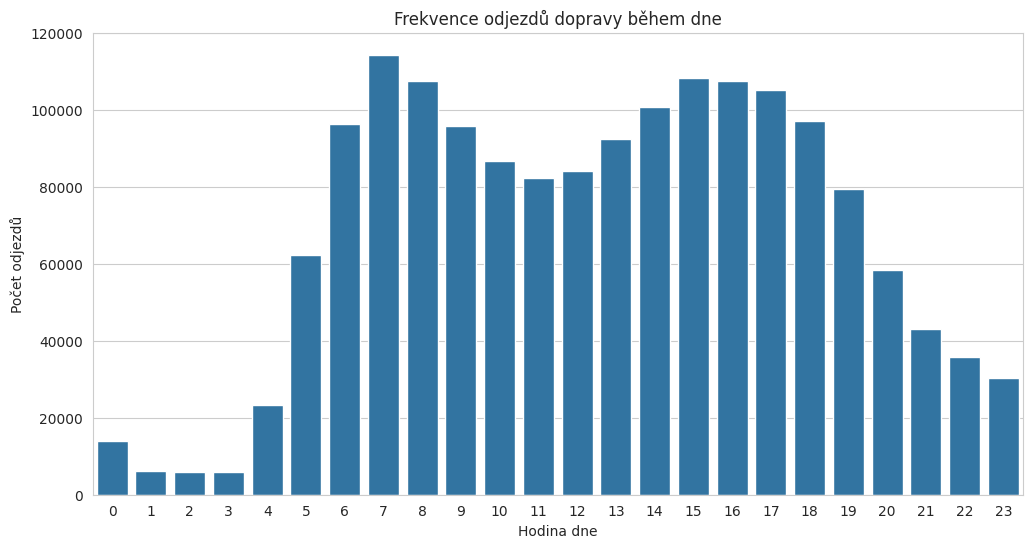

In [19]:
# Extrahování hodiny odjezdu
pid['hour'] = pid['depart_from'].apply(lambda x: x.hour)

# Počítání frekvence jízd pro každou hodinu
hourly_frequency = pid.groupby('hour').size().reset_index(name='count')

# Vizualizace
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='hour', y='count', data=hourly_frequency)
ax.set_title('Frekvence odjezdů dopravy během dne')
ax.set_xlabel('Hodina dne')
ax.set_ylabel('Počet odjezdů');

> ##### 👆Tento graf ukazuje, že
> - ##### Zaprvé, zatížení dopravní sítě v noci je mnohem menší než ve dne
> - ##### Za druhé, během dne jsou patrné dvě špičky, ráno a večer, což je logické, protože lidé ráno jezdí do práce/studia a večer se vracejí domůů.

#### Jak se mění zatížení zastávek v průběhu týdne?  

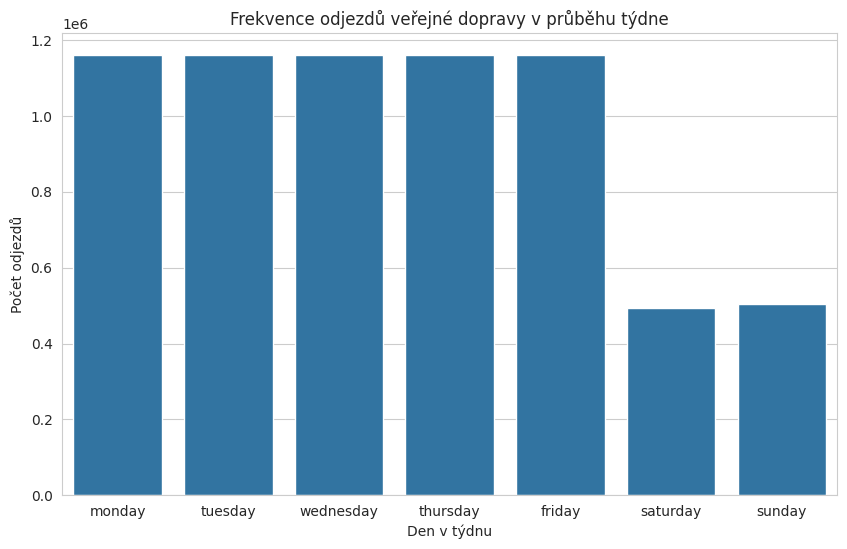

In [20]:
days_of_week = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

weekly_frequency = pid[days_of_week].sum().reset_index()
weekly_frequency.columns = ['day', 'count']

# Vizualizace
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='day', y='count', data=weekly_frequency)
ax.set_title('Frekvence odjezdů veřejné dopravy v průběhu týdne')
ax.set_xlabel('Den v týdnu')
ax.set_ylabel('Počet odjezdů');

> ##### 👆 Tento graf ukazuje, že zatížení dopravního systému je během týdne ve všední dny naprosto stejné. O víkendech je zatížení o více než polovinu nižší než ve všední dny, zatímco v sobotu a v neděli je zatížení rovněž přibližně stejné.

#### Jaká je závislost počtu odjezdů na typu veřejné dopravy?

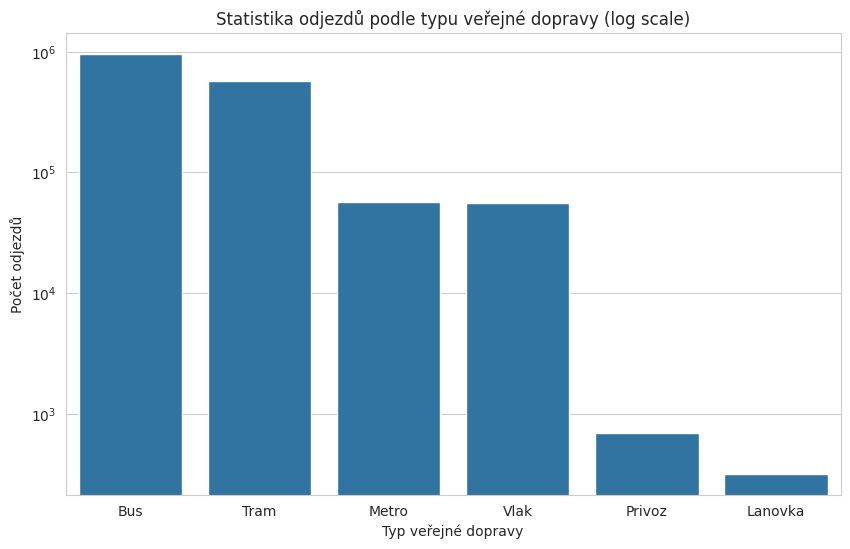

In [21]:
# Počítání frekvence odjezdů pro každý typ veřejné dopravy a seřazení
type_order = pid['route_type'].value_counts().index

# Vytvoření objektu Figure a Axes
fig, ax = plt.subplots(figsize=(10, 6))

# Vizualizace s použitím seaborn a Axes objektu se seřazenými daty
sns.countplot(x='route_type', data=pid, ax=ax, order=type_order)

# Nastavení logaritmické osy Y
ax.set_yscale('log')

ax.set_title('Statistika odjezdů podle typu veřejné dopravy (log scale)')
ax.set_xlabel('Typ veřejné dopravy')
ax.set_ylabel('Počet odjezdů');

> ##### 👆 Tento graf ukazuje, že nejvíce jízd během týdne vykonají autobusy, druhé nejpopulárnější jsou tramvaje, metro a vlaky jsou téměř stejně populární a nejméně jízd vykonají přívozy a lanovky asi kvůli malému počtu linek

## Konec

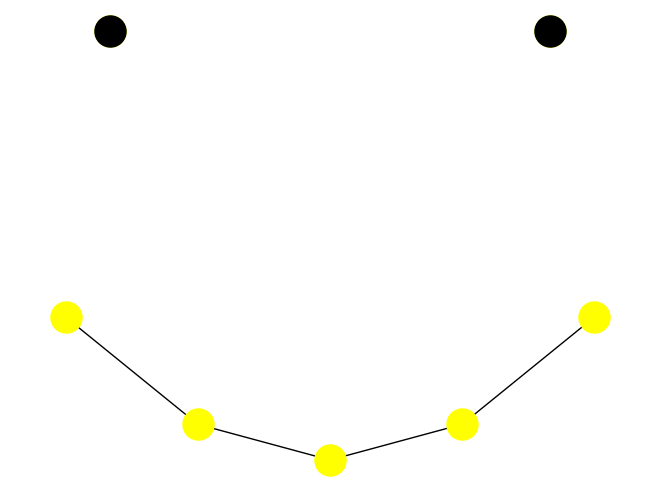

In [22]:
# Vytvoření nového grafu
G = nx.Graph()

# Přidání uzlů s atributy pozic
G.add_node('levé oko', pos=(0.25, 0.6))
G.add_node('pravé oko', pos=(0.75, 0.6))

# Přidání uzlů pro křivku úsměvu
points_smile = [(0.2, 0.2), (0.35, 0.05), (0.5, 0),  (0.65, 0.05), (0.8, 0.2)]
for point in points_smile:
    G.add_node(point, pos=point)

# Přidání hran pro úsměv
G.add_edge((0.2, 0.2), (0.35, 0.05))
G.add_edge((0.35, 0.05), (0.5, 0))
G.add_edge((0.5, 0), (0.65, 0.05))
G.add_edge((0.65, 0.05), (0.8, 0.2))

# Získání pozic uzlů
pos = nx.get_node_attributes(G, 'pos')

# Kreslení grafu
nx.draw(G, pos, with_labels=False, node_size=500, node_color="yellow")

# Kreslení očí jako černých bodů
nx.draw_networkx_nodes(G, pos, nodelist=['levé oko', 'pravé oko'], node_size=500, node_color='black');